# ESDA - Energy Systems - Week 1

## Analysing historical country GHG emissions data

For week 1 of the Energy Systems module, we will examine data historical emissions data by country using the World Resources Institute `CAIT Climate Data Explorer` dataset found here: [http://cait.wri.org/](http://cait.wri.org/).  

Data citation: `CAIT Climate Data Explorer. 2017. Washington, DC: World Resources Institute. Available online at: http://cait.wri.org`  
License: `Creative Commons Attribution-NonCommercial 4.0 International license`

## Questions:

Are the CO2eq calculations using 25 year or 100 year warming potentials? Presumably the latter.

## Gotchas:

`World` total line is included in GHG emissions dataset.  
`European Union (28)` total line is also included in GHG emissions dataset.

# Setup

In [193]:
# Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use(['seaborn'])
font = {'fontname':'Roboto Condensed'} # Have to specify custom font in plots
# Make charts look nice
params = {
    'figure.figsize' : (12, 6), 
    'font.size' : 16, 
    'axes.labelsize' : 'large', 
    'xtick.labelsize' : 'small', 
    'ytick.labelsize' : 'small', 
    'axes.titlesize' : 24, 
    'axes.grid' : True, 
}
plt.rcParams.update(params)

In [2]:
# Let's import some data

# GHG emissions per country from 1990-2014 by sectors
ghg = pd.read_excel('Data set 1 - CAIT_Country_GHG_Emissions.xlsx', sheet_name='GHG Emissions', skiprows=1, index_col='Year')
# CO2 emissions per country from 1850-2014
co2 = pd.read_excel('Data set 1 - CAIT_Country_GHG_Emissions.xlsx', sheet_name='CO2 Total Emissions')
# Socio-economic factors per country from 1960-2014, population, GDP pp, GDP
econ = pd.read_excel('Data set 1 - CAIT_Country_GHG_Emissions.xlsx', sheet_name='Socio-Economic Data')

# Examining all country GHG emissions

## Simplify the dataset

There are lots of columns. Which ones are we interested in?  
Let's just take total GHGs including Land Use, emissions from Energy, and emissions from Electricity/Heat, and emissions from Transport for now. 

In [3]:
ghg['Total GHGs (MtCO2e)'] = ghg['Total GHG Emissions Including Land-Use Change and Forestry (MtCO₂e‍)']
col_list = ['Country', 'Total GHGs (MtCO2e)', 'Energy (MtCO2e)', 'Electricity/Heat (MtCO2)', 'Transportation (MtCO2)']
ghg = ghg[col_list] 
ghg

,Country,Total GHGs (MtCO2e),Energy (MtCO2e),Electricity/Heat (MtCO2),Transportation (MtCO2)
Year,,,,,
1990,Afghanistan,15.212848,3.774044,NaN,NaN
1991,Afghanistan,15.286439,3.376803,NaN,NaN
1992,Afghanistan,14.010531,1.914300,NaN,NaN
1993,Afghanistan,14.028118,1.678073,NaN,NaN
1994,Afghanistan,13.985408,1.456451,NaN,NaN
1995,Afghanistan,14.334937,1.242156,NaN,NaN
1996,Afghanistan,15.323211,1.179521,NaN,NaN
1997,Afghanistan,16.284527,1.098565,NaN,NaN
1998,Afghanistan,17.124436,1.046922,NaN,NaN


In [4]:
# Let's isolate the World line so we can aggregate all results
world = ghg[ghg['Country'] == 'World'] 
ghg = ghg[(ghg['Country'] != 'World') & (ghg['Country'] != 'European Union (28)')]

## Fig 1 - Total GHG emissions by year

In [5]:
# Plot Total GHG emissions by year
total_ghgs = ghg.groupby(by=['Year']).sum()['Total GHGs (MtCO2e)']

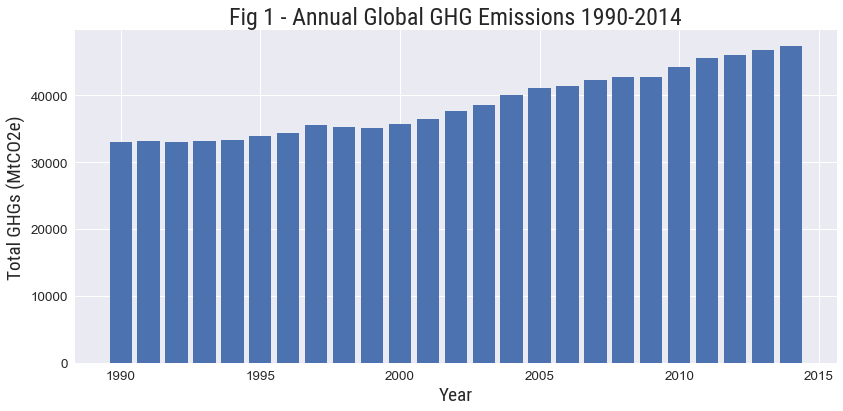

In [6]:
plt.bar(left=total_ghgs.index, height=total_ghgs)
plt.xlabel('Year', **font)
plt.ylabel('Total GHGs (MtCO2e)', **font)
plt.title('Fig 1 - Annual Global GHG Emissions 1990-2014', **font)
plt.tight_layout()
plt.savefig('Fig 1 - Annual Global GHG Emissions 1990-2014.png', dpi=300)

The world plot and the **everything that isn't world or EU28** rows plot now look identical, plus it matches WRI's own [online viewer](https://www.climatewatchdata.org/ghg-emissions?source=31&version=1) so I think we're good.

### Test box plots

In [7]:
# Box Plot
a = [10,20,30,40]
b = [5,6,7,8]
test = pd.DataFrame(data = [a,b], columns=[1,2,3,4], index=['a', 'b'])
# test = pd.DataFrame(data = [a], columns=[1,2,3,4], index=['a'])
test

,1,2,3,4
a,10,20,30,40
b,5,6,7,8


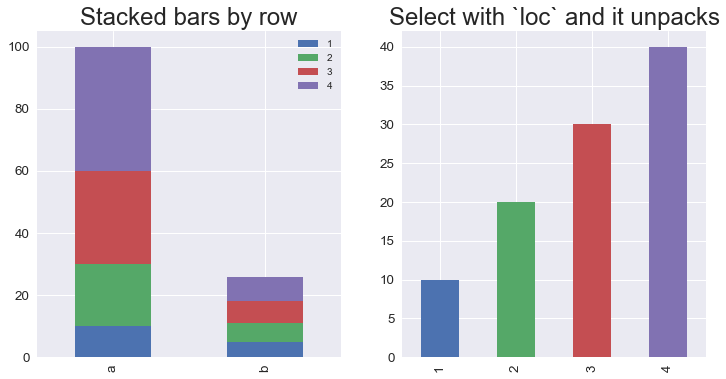

In [8]:
f, axe = plt.subplots(1, 2)
test.plot.bar(stacked=True, ax=axe[0])
test.loc['a'].plot.bar(stacked=True, ax=axe[1])
axe[0].set_title('Stacked bars by row')
axe[1].set_title('Select with `loc` and it unpacks')

## Fig 2 - Total GHG Emissions by Year stacked by country

In [9]:
ghg_yearly = ghg.groupby(by=['Year', 'Country']).mean()
ghg_yearly = ghg_yearly[['Total GHGs (MtCO2e)']] # Remember to feed new column list as array.
ghg_yearly = ghg_yearly.reset_index()
# I want the rows to be the year. Columns to be country name, and values to be Total GHGs.

In [10]:
# So set index to year again.
ghg_yearly = ghg_yearly.set_index('Year')

In [11]:
# Pivot with year as index and columns as country
# The desired format!
ghg_yearly = ghg_yearly.pivot(index=ghg_yearly.index, columns='Country')
ghg_yearly

Total GHGs (MtCO2e)                                               \
Country         Afghanistan    Albania     Algeria   Andorra      Angola   
Year                                                                       
1990              15.212848  11.836115   91.705749  0.409916  160.315480   
1991              15.286439   9.263110   91.143202  0.411283  161.909610   
1992              14.010531   7.014661   91.294187  0.412651  163.169861   
1993              14.028118   6.741120   99.333015  0.417683  164.890511   
1994              13.985408   7.282326   97.661053  0.415387  165.968748   
1995              14.334937   6.838825   99.718402  0.435075  171.298303   
1996              15.323211   6.540364  100.564302  0.465507  174.392880   
1997              16.284527   5.830689  104.230242  0.477620  169.911560   
1998              17.124436   6.053516  109.127458  0.504388  183.586804   
1999              18.000555   7.217556  114.628410  0.527493  176.519707   
2000              16.496011   7.565397  118.318504  0.539605  177.306729   
2001              15.209422   8.240178  115.268050  0.531518  162.879205   
2002              17.699094   8.875754  122.014144  0.540224  184.966402   
2003              18.430439   9.296451  126.956416  0.545266  200.023184   
2004              18.151347   9.367428  130.228985  0.572292  216.245334   
2005              18.984698   9.140728  135.122419  0.588326  221.041222   
2006              19.622923   7.941579  134.070595  0.550823  201.882700   
2007              20.398946   8.169868  142.232099  0.545324  234.992243   
2008              23.630011   7.752483  147.059738  0.547153  226.031272   
2009              26.942855   7.820213  157.102999  0.526998  237.034741   
2010              30.629559   8.101157  158.850875  0.528827  252.037260   
2011              34.713007   8.448323  171.442060  0.521699  283.418296   
2012              34.501590   8.114825  182.120271  0.519366  250.752943   
2013              33.170920   8.199265  187.088061  0.509704  270.339084   
2014              33.366148   8.678753  201.685126  0.496379  252.092930   

                                                                         \
Country Antigua & Barbuda   Argentina    Armenia   Australia    Austria   
Year                                                                      
1990             0.386336  303.461139  24.068760  479.524566  63.134339   
1991             0.378960  307.896989  24.701099  478.398643  67.079516   
1992             0.382762  312.247163  14.366930  478.393125  61.928966   
1993             0.397948  312.415519   8.260334  479.699535  61.913794   
1994             0.402383  322.536560   5.764428  486.791946  61.838595   
1995             0.417623  324.177705   6.367514  494.443362  64.454936   
1996             0.453867  333.167006   5.307717  498.242519  68.017577   
1997             0.486538  336.959109   5.926061  507.126816  66.933131   
1998             0.515291  340.167021   5.881642  533.526801  67.372477   
1999             0.544125  347.303453   5.381288  571.398727  65.505445   
2000             0.576227  346.255070   5.723347  588.302924  65.537027   
2001             0.618731  357.183521   5.851980  643.412355  74.409198   
2002             0.664841  354.181686   5.472131  642.785166  75.843460   
2003             0.722100  374.039285   5.884753  593.960008  81.669036   
2004             0.764220  397.461930   6.249617  628.815785  81.494682   
2005             0.794887  394.316707   6.985512  603.387970  81.973002   
2006             0.934601  427.797447   7.140247  603.838647  82.261019   
2007             0.989009  428.825779   7.931878  597.556778  79.888108   
2008             1.027527  446.693288   8.502187  573.954089  80.172240   
2009             1.084397  427.233081   7.370414  590.572670  73.753594   
2010             1.108693  418.671802   7.196158  561.946314  78.656700   
2011             1.038881  424.826296   7.561231  579.115830  76.215474   
2012

In [12]:
# Drop the double multi-index, see https://stackoverflow.com/questions/22233488/pandas-drop-a-level-from-a-multi-level-column-index#36682678
ghg_yearly = ghg_yearly.xs('Total GHGs (MtCO2e)', axis=1, drop_level=True)

In [13]:
# Define annual emissions for Other cutoff
cutoff = 350

In [14]:
# Create other column for sum of small emitting countries
ghg_yearly['Other'] = ghg_yearly.T[ghg_yearly.T[1990]<cutoff].sum()

/Users/laurence/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [15]:
# Keep the large countries
ghg_yearly2 = ghg_yearly.T.reset_index()[ghg_yearly.T.reset_index()[1990]>=cutoff]
ghg_yearly2 = ghg_yearly2.set_index('Country')
ghg_yearly2.T.loc['Other'] = ghg_yearly['Other']

In [16]:
# Transpose again to get into right orientation
ghg_yearly2 = ghg_yearly2.T

In [17]:
# Order so bars are ascending
ghg_yearly2 = ghg_yearly2.T.sort_values(2014, ascending=False).T

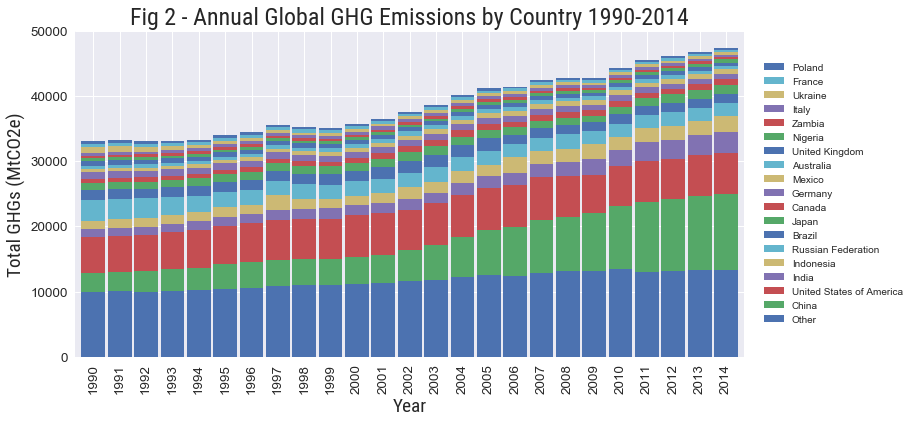

In [18]:
ax = ghg_yearly2.plot.bar(stacked=True, width=0.9)
# Reverse legend handles and plot outside plot
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), loc='right', bbox_to_anchor=(1.25, 0.5))
ax.xaxis.set_label_text('Year', **font)
ax.yaxis.set_label_text('Total GHGs (MtCO2e)', **font)
axes = plt.gca()
axes.set_ylim([0,50000])
plt.title('Fig 2 - Annual Global GHG Emissions by Country 1990-2014', **font)
# Include bbox_extra_artist to ensure it gets the legend
plt.savefig('Fig 2 - Annual Global GHG Emissions 1990-2014.png', dpi=300, bbox_inches='tight', bbox_extra_artist=[ax.legend])

In [19]:
##### As that was a real pain, let's put it into a function

def country_chart(col, cutoff, ylabel, title, vmax):
    df = ghg.groupby(by=['Year', 'Country']).mean()
    df = df[[col]] # Remember to feed new column list as array.
    df = df.reset_index()
    df = df.set_index('Year')
    df = df.pivot(index=df.index, columns='Country')
    df = df.xs(col, axis=1, drop_level=True)
    cutoff = cutoff
    df['Other'] = df.T[df.T[1990]<cutoff].sum()
    # Keep the large countries
    df2 = df.T.reset_index()[df.T.reset_index()[1990]>=cutoff]
    df2 = df2.set_index('Country')
    df2.T.loc['Other'] = df['Other']
    # Transpose again to get into right orientation
    df2 = df2.T
    df2 = df2.T.sort_values(2014, ascending=False).T
    ax = df2.plot.bar(stacked=True, width=0.9)
    # Reverse legend handles and plot outside plot
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(reversed(handles), reversed(labels), loc='right', bbox_to_anchor=(1.25, 0.5))
    ax.xaxis.set_label_text('Year', **font)
    ax.yaxis.set_label_text(ylabel, **font)
    axes = plt.gca()
    axes.set_ylim([0,vmax])
    plt.title(title, **font)
    # Include bbox_extra_artist to ensure it gets the legend
    plt.savefig(title + '.png', dpi=300, bbox_inches='tight', bbox_extra_artist=[ax.legend])
    return

## Energy Emissions

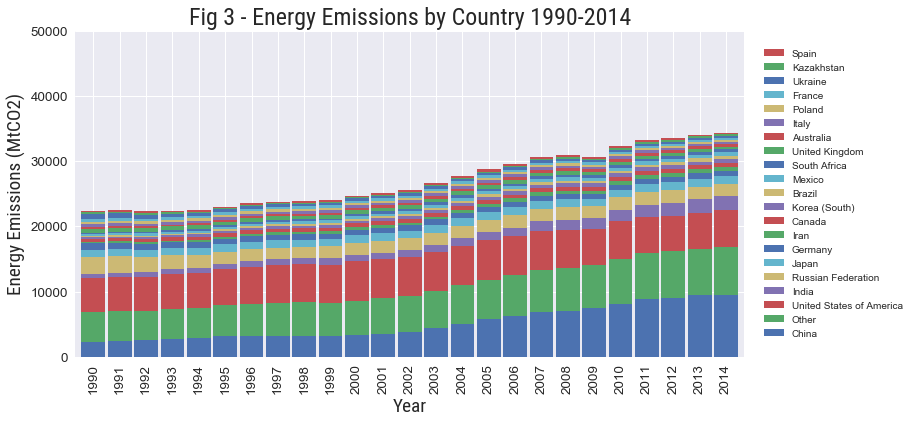

In [20]:
col = 'Energy (MtCO2e)'
cutoff = 200
ylabel = 'Energy Emissions (MtCO2)'
title = 'Fig 3 - Energy Emissions by Country 1990-2014'
country_chart(col, cutoff, ylabel, title, 50000)

## Electricity / Heat Emissions

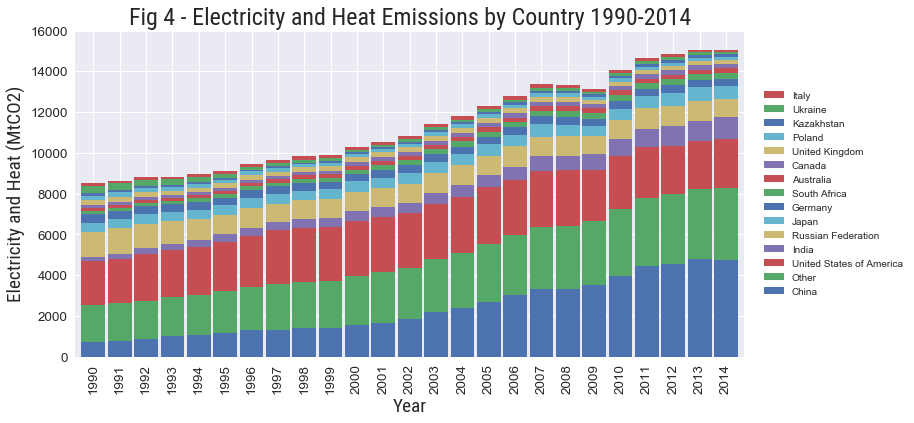

In [21]:
col = 'Electricity/Heat (MtCO2)'
cutoff = 100
ylabel = 'Electricity and Heat (MtCO2)'
title = 'Fig 4 - Electricity and Heat Emissions by Country 1990-2014'
country_chart(col, cutoff, ylabel, title, 16000)

## Transport Emissions

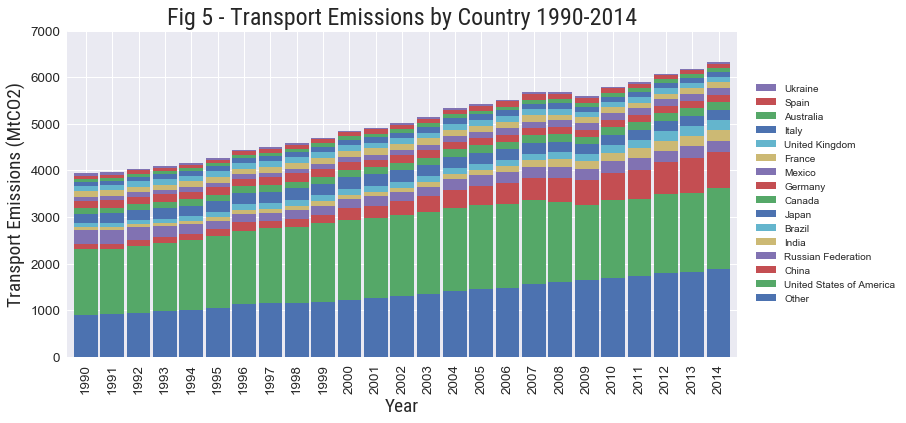

In [22]:
col = 'Transportation (MtCO2)'
cutoff = 50
ylabel = 'Transport Emissions (MtCO2)'
title = 'Fig 5 - Transport Emissions by Country 1990-2014'
country_chart(col, cutoff, ylabel, title, 7000)

## CO2 since 1850

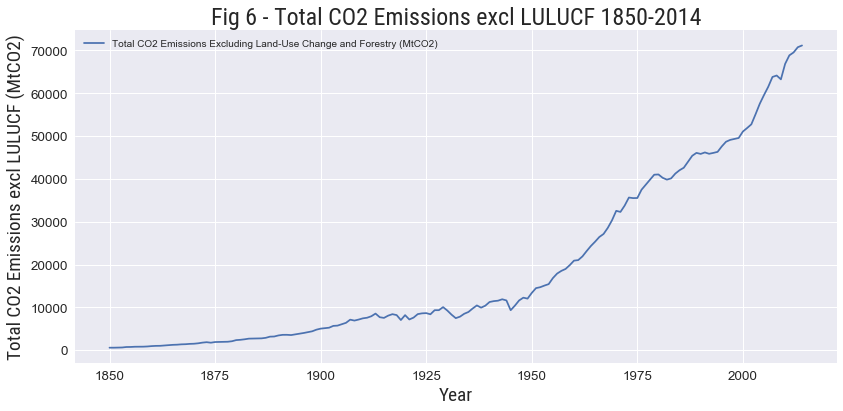

In [23]:
co2.groupby(by=['Year']).agg('sum').plot()
plt.xlabel('Year', **font)
plt.ylabel('Total CO2 Emissions excl LULUCF (MtCO2)', **font)
plt.title('Fig 6 - Total CO2 Emissions excl LULUCF 1850-2014', **font)
plt.tight_layout()
plt.savefig('Fig 6 - Annual Global GHG Emissions 1850-2014.png', dpi=300)

## Energy emissions vs GDP w/ scatter plot of pop size.. in a gif

First we need to join ghg data with econ data.

In [24]:
ghg = ghg.reset_index()
ghg.head()

,Year,Country,Total GHGs (MtCO2e),Energy (MtCO2e),Electricity/Heat (MtCO2),Transportation (MtCO2)
0,1990,Afghanistan,15.212848,3.774044,NaN,NaN
1,1991,Afghanistan,15.286439,3.376803,NaN,NaN
2,1992,Afghanistan,14.010531,1.914300,NaN,NaN
3,1993,Afghanistan,14.028118,1.678073,NaN,NaN
4,1994,Afghanistan,13.985408,1.456451,NaN,NaN


In [25]:
econ.head()

,Country,Year,Population (People),GDP-PPP (Million Intl$ (2011)),GDP-USD (Million US$ (2010))
0,Afghanistan,1960,8996351.0,NaN,NaN
1,Albania,1960,1608800.0,NaN,NaN
2,Algeria,1960,11124888.0,NaN,27434.399199
3,Andorra,1960,13411.0,NaN,NaN
4,Angola,1960,5643182.0,NaN,NaN


In [26]:
# Check for missing country names:
econ_c = econ['Country'].unique()
ghg_c = ghg['Country'].unique()

print('GHG names not matched:')
for x in ghg_c:
    if x not in econ_c:
        print(x)
print('Econ names not matched:')
for x in econ_c:
    if x not in ghg_c:
        print(x)

GHG names not matched:
Econ names not matched:
European Union (28)
World


In [27]:
# Remove world and EU28
econ = econ[(econ['Country'] != 'World') & (econ['Country'] != 'European Union (28)')]

In [28]:
# Join econ to energy, then make yearly plots. 
# Then join to make a gif

In [29]:
# Before joining, make econ 1990+
econ = econ[econ['Year'] >= 1990]

In [30]:
# Join
merged = pd.merge(ghg, econ, on=['Country','Year'])

In [31]:
merged['GDP per Capita'] = merged['GDP-USD (Million US$ (2010))']/merged['Population (People)']

In [32]:
# Reduce pop size number
merged['Population (m)'] = merged['Population (People)'] / 1000000

In [33]:
merged.head()

,Year,Country,Total GHGs (MtCO2e),Energy (MtCO2e),Electricity/Heat (MtCO2),Transportation (MtCO2),Population (People),GDP-PPP (Million Intl$ (2011)),GDP-USD (Million US$ (2010)),GDP per Capita,Population (m)
0,1990,Afghanistan,15.212848,3.774044,NaN,NaN,12249114.0,NaN,NaN,NaN,12.249114
1,1991,Afghanistan,15.286439,3.376803,NaN,NaN,12993657.0,NaN,NaN,NaN,12.993657
2,1992,Afghanistan,14.010531,1.914300,NaN,NaN,13981231.0,NaN,NaN,NaN,13.981231
3,1993,Afghanistan,14.028118,1.678073,NaN,NaN,15095099.0,NaN,NaN,NaN,15.095099
4,1994,Afghanistan,13.985408,1.456451,NaN,NaN,16172719.0,NaN,NaN,NaN,16.172719


In [34]:
merged.to_csv('co2_vs_econ.csv')

### Map countries to continents

In [68]:
# Map regions to country names
import pycountry as pycountry
import pycountry_convert as pycountry_convert

def get_continent(country):
    try:
        code = pycountry.countries.lookup(country).alpha_2
        cont_code = pycountry_convert.country_alpha2_to_continent_code(code)
        cont_name = pycountry_convert.convert_continent_code_to_continent_name(cont_code)
    except:
        cont_name = 'Unknown'
    return cont_name

In [69]:
merged['Continent'] = merged.apply(lambda x: get_continent(x['Country']), axis=1)

In [72]:
# merged[merged.Continent == 'Unknown']

# Get rid of Antigua & Trinidad
merged = merged[merged.Continent != 'Unknown']

### Make dict of yearly datasets.

In [74]:
# TEST: year_1990 = merged[merged['Year'] == 1990]
years = {} # My dictionary of years

for x in range(1990, 2015):
    years[x] = merged[merged['Year'] == x]

### Create the images

In [75]:
merged.Continent.unique()

array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
       'North America'], dtype=object)

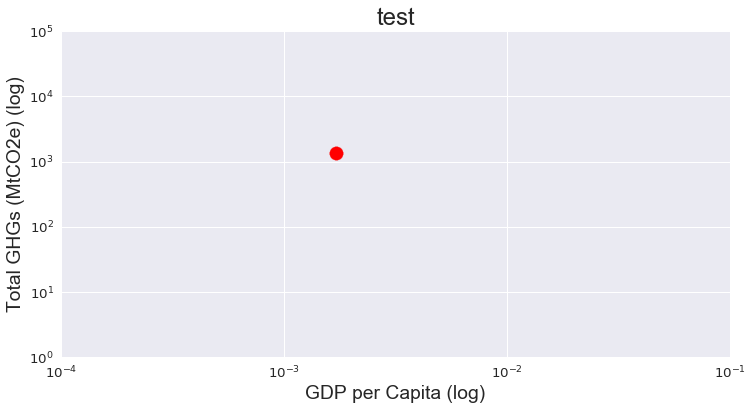

In [161]:
df = years[1990][(years[1990]['Country'] == 'Indonesia')]
title='test'

colors = {'Asia': 'red', 'Europe': 'blue', 'Africa':'green', 'South America':'yellow', 'Oceania':'pink','North America':'purple'}
size = df['Population (m)']
col = df['Continent'].apply(lambda x: colors[x])
fig, ax = plt.subplots()
ax.scatter(df['GDP per Capita'], df['Total GHGs (MtCO2e)'], s=size, c=col)
ax.xaxis.set_label_text('GDP per Capita (log)')
ax.yaxis.set_label_text('Total GHGs (MtCO2e) (log)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([0.0001,0.1])
ax.set_ylim([1,100000])
lines, labels = ax.get_legend_handles_labels()
# plt.legend((lines[:]),('Asia', 'Europe', 'Africa', 'South America', 'Oceania','North America'))
plt.title(title)

In [81]:
def year_plot(df, title):
    colors = {'Asia': 'red', 'Europe': 'blue', 'Africa':'green', 'South America':'yellow', 
               'Oceania':'pink','North America':'purple'}
    size = df['Population (m)']
    colors = df['Continent'].apply(lambda x: colors[x])
    fig, ax = plt.subplots()
    ax.scatter(df['GDP per Capita'], df['Total GHGs (MtCO2e)'], s=size, c='#348ed8')
    ax.xaxis.set_label_text('GDP per Capita (log)')
    ax.yaxis.set_label_text('Total GHGs (MtCO2e) (log)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim([0.0001,0.1])
    ax.set_ylim([1,100000])
    plt.title(title)

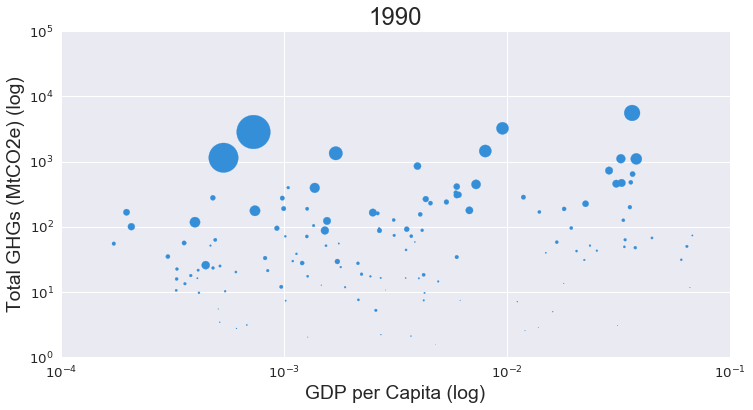

In [82]:
# Generate chart from 1990-2014
for x in range(1990, 1991):
    year_plot(years[x],x)
    plt.savefig('GDPvsGHGs_%s.png' % str(x), dpi=300)

### Great success with images, now gif it up

In [163]:
# import imageio
# import os

# images = []
# for filename in os.listdir('GDPvsGHGslog'):
#     images.append(imageio.imread('GDPvsGHGslog/' + filename))
# imageio.mimsave('GDPvsGHG.gif', images)

ValueError: Could not find a format to read the specified file in mode 'i'

### Global Emissions vs Global GDP

In [201]:
merged.head()

,Year,Country,Total GHGs (MtCO2e),Energy (MtCO2e),Electricity/Heat (MtCO2),Transportation (MtCO2),Population (People),GDP-PPP (Million Intl$ (2011)),GDP-USD (Million US$ (2010)),GDP per Capita,Population (m),Continent,GHG per Capita
0,1990,Afghanistan,15.212848,3.774044,NaN,NaN,12249114.0,NaN,NaN,NaN,12.249114,Asia,0.001242
1,1991,Afghanistan,15.286439,3.376803,NaN,NaN,12993657.0,NaN,NaN,NaN,12.993657,Asia,0.001176
2,1992,Afghanistan,14.010531,1.914300,NaN,NaN,13981231.0,NaN,NaN,NaN,13.981231,Asia,0.001002
3,1993,Afghanistan,14.028118,1.678073,NaN,NaN,15095099.0,NaN,NaN,NaN,15.095099,Asia,0.000929
4,1994,Afghanistan,13.985408,1.456451,NaN,NaN,16172719.0,NaN,NaN,NaN,16.172719,Asia,0.000865


In [199]:
merged['GHG per Capita'] = merged['Total GHGs (MtCO2e)'] * 1000 / merged['Population (People)']

/Users/laurence/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [212]:
merged['Population'] = merged['Population (People)'] / 10000000000

/Users/laurence/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [220]:
capita_rebase = merged.pivot_table(index=['Year'], aggfunc='sum')['GDP per Capita'][1990]
ghg_rebase = merged.pivot_table(index=['Year'], aggfunc='sum')['GHG per Capita'][1990]
pop_rebase = merged.pivot_table(index=['Year'], aggfunc='sum')['Population (m)'][1990]

In [227]:
merged['GDP per cap rebased'] = merged['GDP per Capita'] / capita_rebase
merged['GHG per cap rebased'] = merged['GHG per Capita'] / ghg_rebase
merged['Population rebased'] = merged['Population (m)'] / pop_rebase

/Users/laurence/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/laurence/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/laurence/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [213]:
merged.head()

,Year,Country,Total GHGs (MtCO2e),Energy (MtCO2e),Electricity/Heat (MtCO2),Transportation (MtCO2),Population (People),GDP-PPP (Million Intl$ (2011)),GDP-USD (Million US$ (2010)),GDP per Capita,Population (m),Continent,GHG per Capita,Population
0,1990,Afghanistan,15.212848,3.774044,NaN,NaN,12249114.0,NaN,NaN,NaN,12.249114,Asia,0.001242,0.001225
1,1991,Afghanistan,15.286439,3.376803,NaN,NaN,12993657.0,NaN,NaN,NaN,12.993657,Asia,0.001176,0.001299
2,1992,Afghanistan,14.010531,1.914300,NaN,NaN,13981231.0,NaN,NaN,NaN,13.981231,Asia,0.001002,0.001398
3,1993,Afghanistan,14.028118,1.678073,NaN,NaN,15095099.0,NaN,NaN,NaN,15.095099,Asia,0.000929,0.001510
4,1994,Afghanistan,13.985408,1.456451,NaN,NaN,16172719.0,NaN,NaN,NaN,16.172719,Asia,0.000865,0.001617


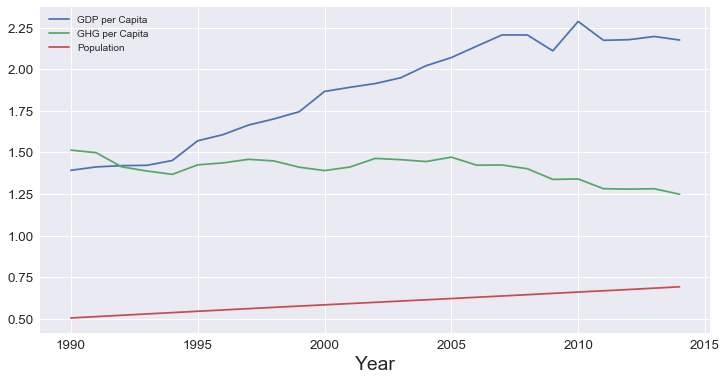

In [214]:
merged.pivot_table(index=['Year'], aggfunc='sum').loc[:, ['GDP per Capita','GHG per Capita', 'Population']].plot()

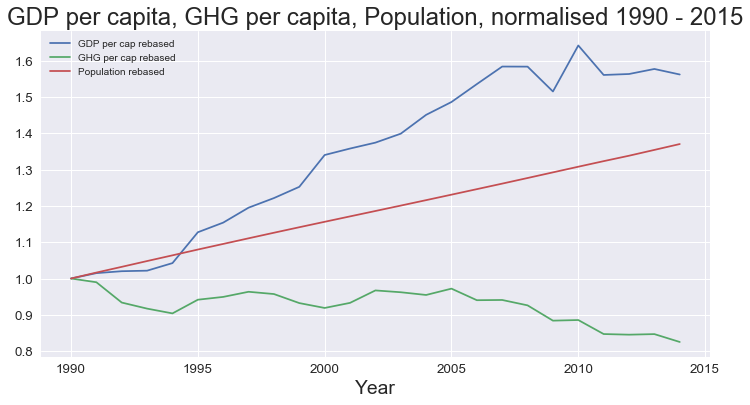

In [224]:
merged.pivot_table(index=['Year'], aggfunc='sum').loc[:, ['GDP per cap rebased','GHG per cap rebased', 'Population rebased']].plot()
plt.title('GDP per capita, GHG per capita, Population, normalised 1990 - 2015')
plt.savefig('GDP and GHG vs population normalised 1990-2015.png', dpi=300)